- [Task A - Pre Processing](#Task-A---Pre-Processing)
 - [Checking missing values](#Checking-if-datasets-have-missing-values)
 - [Handling categorical data](#Handling-categorical-data)
 - [Encoding class labels](#Encoding-class-labels)
 - [Partitioning datasets](#Partitioning-datasets-in-training-and-test-sets)
 - [Rank features](#Rank-features)
   - [1. Univariate Feature Selection](#1.-Univariate-Feature-Selection)
     - [1.1 Mutual Info Classif](#1.1-Mutual-Info-Classif)
     - [1.2 Chi-squared](#1.2-Chi-squared)
 - [Dimension reduction](#Dimension-reduction)
- [Task B - Predictive Model](#Task-B---Predictive-Model)


In [1]:
import pandas as pd
import numpy as np
import xlrd
import copy
%matplotlib inline

In [2]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Reading datasets

In [3]:
# Banknotes dataset

df_bankNotes = pd.read_excel('./data_banknote_authentication.xlsx')
#df_bankNotes

In [4]:
# Nursery dataset

df_nursery = pd.read_excel('./nursery.xlsx')
#df_nursery

# Task A - Pre Processing

## Checking if datasets have missing values

In [5]:
# Banknotes dataset

df_bankNotes.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

In [6]:
# Nursery dataset

df_nursery.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

## Handling categorical data

### Mapping ordinal features

In [7]:
# Nursery dataset

# print features before mapping
#df_nursery[df_nursery.columns[0:8]]

In [8]:
# Nursery dataset

# get dataset copy
df_nursery_copy = df_nursery.copy()

# cast data to string
df_nursery_copy = df_nursery_copy.astype(str)

# map features
parents_mapping = {'usual':1, 'pretentious':2, 'great_pret':3}
df_nursery_copy['parents'] = df_nursery_copy['parents'].map(parents_mapping)

has_nurs_mapping = {'proper':1, 'less_proper':2, 'improper':3, 'critical':4, 'very_crit':5}
df_nursery_copy['has_nurs'] = df_nursery_copy['has_nurs'].map(has_nurs_mapping)

form_mapping = {'complete':1, 'completed':2, 'incomplete':3, 'foster':4}
df_nursery_copy['form'] = df_nursery_copy['form'].map(form_mapping)

children_mapping = {'1':1, '2':2, '3':3, 'more':4}
df_nursery_copy['children'] = df_nursery_copy['children'].map(children_mapping)

housing_mapping = {'convenient':1, 'less_conv':2, 'critical':3}
df_nursery_copy['housing'] = df_nursery_copy['housing'].map(housing_mapping)

finance_mapping = {'convenient':1, 'inconv':2}
df_nursery_copy['finance'] = df_nursery_copy['finance'].map(finance_mapping)

social_mapping = {'nonprob':1, 'slightly_prob':2, 'problematic':3}
df_nursery_copy['social'] = df_nursery_copy['social'].map(social_mapping)

health_mapping = {'recommended':1, 'priority':2, 'not_recom':3}
df_nursery_copy['health'] = df_nursery_copy['health'].map(health_mapping)

In [9]:
# Nursery dataset

# print features after mapping
df_nursery_copy[df_nursery_copy.columns[0:8]]

,parents,has_nurs,form,children,housing,finance,social,health
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,3
3,1,1,1,1,1,1,2,1
4,1,1,1,1,1,1,2,2
5,1,1,1,1,1,1,2,3
6,1,1,1,1,1,1,3,1
7,1,1,1,1,1,1,3,2
8,1,1,1,1,1,1,3,3
9,1,1,1,1,1,2,1,1


## Encoding class labels

In [10]:
# Nursery dataset

# print labels before encoding
#df_nursery_copy[df_nursery_copy.columns[8]]

In [11]:
# Nursery dataset

class_mapping = {label:idx for idx,label in enumerate(np.unique(df_nursery_copy[df_nursery_copy.columns[8]]))}

class_mapping

{'not_recom': 0,
 'priority': 1,
 'recommend': 2,
 'spec_prior': 3,
 'very_recom': 4}

In [12]:
# Nursery dataset

# map labels
df_nursery_copy[df_nursery_copy.columns[8]] = df_nursery_copy[df_nursery_copy.columns[8]].map(class_mapping)

In [13]:
# Nursery dataset

# print labels after encoding
df_nursery_copy[df_nursery_copy.columns[8]]

0        2
1        1
2        0
3        2
4        1
5        0
6        1
7        1
8        0
9        4
10       1
11       0
12       4
13       1
14       0
15       1
16       1
17       0
18       4
19       1
20       0
21       4
22       1
23       0
24       1
25       1
26       0
27       4
28       1
29       0
        ..
12930    3
12931    3
12932    0
12933    3
12934    3
12935    0
12936    3
12937    3
12938    0
12939    3
12940    3
12941    0
12942    3
12943    3
12944    0
12945    3
12946    3
12947    0
12948    3
12949    3
12950    0
12951    3
12952    3
12953    0
12954    3
12955    3
12956    0
12957    3
12958    3
12959    0
Name: class, Length: 12960, dtype: int64

## Partitioning datasets in training and test sets

In [14]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

In [15]:
# Banknotes dataset

# labels reading
y1=df_bankNotes[df_bankNotes.columns[4]]
# features reading
X1=df_bankNotes[df_bankNotes.columns[0:4]]

# get training and test sets
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.3)

In [16]:
# Nursery dataset

# labels reading
y2=df_nursery_copy[df_nursery_copy.columns[8]]
# features reading
X2=df_nursery_copy[df_nursery_copy.columns[0:8]]

# get training and test sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.3)

## Rank features

### 1. Univariate Feature Selection

Univariate feature selection selects the best features by running univariate statistical tests like **chi-squared test, F-1 test, and mutual information** methods.
Can't use the **chi-squared** function, if there are negative values.
#### 1.1 Mutual Info Classif

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

test = SelectKBest(score_func = mutual_info_classif, k=2)
test

SelectKBest(k=2, score_func=<function mutual_info_classif at 0x1123F588>)

In [18]:
test.fit(X_train1, y_train1)
num_features = len(X_train1.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train1.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.36557863736653595, 'variance of Wavelet Transformed image'), (0.25913557507771956, 'skewness of Wavelet Transformed image'), (0.11018343251776286, 'curtosis of Wavelet Transformed image'), (0.026967510460847333, 'entropy of image')]


In [19]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.6681108949489805, 'health'), (0.13915691819838383, 'has_nurs'), (0.059753787445665285, 'parents'), (0.008673070398756977, 'social'), (0.006047873059815689, 'housing'), (0.005334285330148347, 'children'), (0.005301410844571919, 'finance'), (0.004101306189281839, 'form')]


#### 1.2 Chi-squared

In [20]:
from sklearn.feature_selection import chi2
test = SelectKBest(score_func = chi2, k=2)

In [21]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(2306.489300694959, 'health'), (1384.3595570528566, 'has_nurs'), (289.5234812444585, 'parents'), (78.5691964015727, 'housing'), (74.15106517759685, 'children'), (44.80006481486433, 'social'), (25.871042340281797, 'form'), (7.652509699919772, 'finance')]


## Dimension reduction

### Banknotes

Explained variance ratio: [0.75734522 0.14277695 0.06957819 0.03029965]


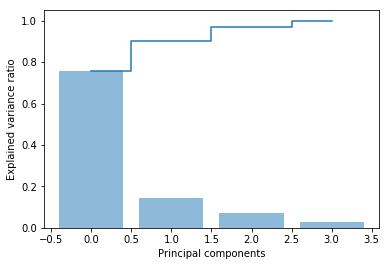

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(X_train1)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()


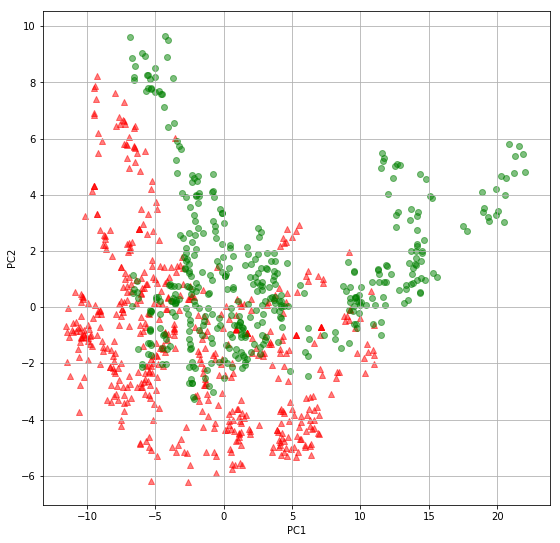

In [23]:
pca = PCA(n_components=2)
X_train_pca1 = pca.fit_transform(X_train1)
print

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1) 

ax.scatter(X_train_pca1[y_train1 == 0, 0], X_train_pca1[y_train1 == 0, 1],
              color='red', marker='^', alpha=0.5)
ax.scatter(X_train_pca1[y_train1 == 1, 0], X_train_pca1[y_train1 == 1, 1],
              color='green', marker='o', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# plt.savefig('./figures/half_moon_2.png', dpi=300)
ax.grid()
plt.show()

In [24]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-0.13576674 -0.81286901  0.54773516  0.14421361]
 [-0.80268016  0.27033636  0.31499028 -0.42825687]]
singular_ values
 [216.01242481  93.79092887]


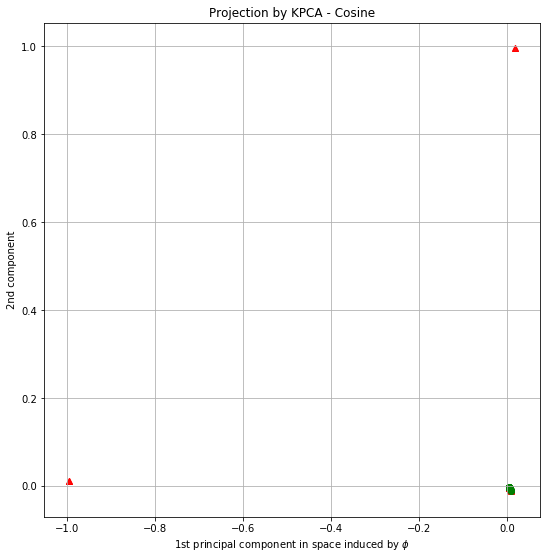

            0         1
0    0.007454 -0.007611
1    0.006262 -0.005506
2    0.004642 -0.003580
3    0.004668 -0.003607
4    0.005891 -0.004976
5    0.004484 -0.003417
6    0.004527 -0.003462
7    0.004467 -0.003401
8    0.005387 -0.004492
9    0.004704 -0.003650
10   0.005261 -0.004286
11   0.005435 -0.004463
12   0.006362 -0.006026
13   0.005284 -0.004283
14   0.004627 -0.003566
15   0.005827 -0.004936
16   0.004466 -0.003399
17   0.006116 -0.005271
18   0.004466 -0.003396
19   0.005469 -0.004475
20   0.004634 -0.003591
21   0.004478 -0.003411
22   0.004561 -0.003497
23   0.005706 -0.004810
24   0.004490 -0.003424
25   0.004482 -0.003416
26   0.004713 -0.003725
27   0.005964 -0.005108
28   0.004574 -0.003509
29   0.004664 -0.003604
..        ...       ...
930  0.004840 -0.003791
931  0.004466 -0.003399
932  0.004467 -0.003400
933  0.005025 -0.004012
934  0.004467 -0.003400
935  0.006112 -0.005309
936  0.004485 -0.003419
937  0.005122 -0.004119
938  0.005765 -0.004846
939  0.004483 -0

In [25]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA( n_components = 2, kernel="rbf", fit_inverse_transform=True, gamma=10)
X_train_kpca1 = kpca.fit_transform(X_train1)
fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca1[y_train1 == 0, 0], X_train_kpca1[y_train1 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca1[y_train1 == 1, 0], X_train_kpca1[y_train1 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.title("Projection by KPCA - Cosine")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()

X_train1_v2 = pd.DataFrame(data=X_train_kpca1)
print(X_train1_v2)

### Nursery

Explained variance ratio: [0.26864538 0.17131279 0.16671192 0.09068937 0.09044822 0.08972079
 0.08872642 0.03374511]


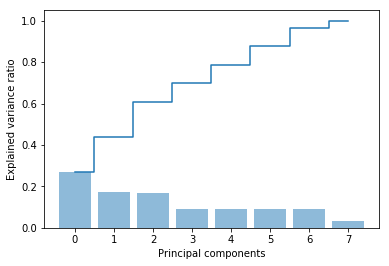

In [26]:
pca = PCA()
principalComponents = pca.fit_transform(X_train2)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()


In [27]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-3.58334455e-04  9.99141999e-01 -3.02577916e-02  2.69215547e-02
  -7.37681151e-03 -1.13409793e-06 -2.66473603e-03 -3.64899040e-03]
 [ 1.59110285e-03 -8.01826873e-03 -7.98556782e-01 -6.01796865e-01
  -3.73269494e-03 -3.70627984e-03 -7.20611459e-03 -1.08514541e-03]
 [-7.18543446e-03  3.96352755e-02  6.01104965e-01 -7.97938146e-01
  -3.80225121e-03 -2.49930399e-03 -1.78165854e-02  2.61080871e-03]
 [ 5.11600943e-01 -5.59484461e-03  2.86793634e-03  3.24744620e-03
  -8.40533794e-01  1.22308680e-02 -6.55966477e-02  1.65120648e-01]
 [-8.79539546e-02  4.52802526e-03  2.23801334e-03 -1.40916269e-02
  -1.27196065e-02 -1.26684952e-02  8.35960263e-01  5.41191441e-01]
 [ 5.68190136e-01  5.04862988e-03 -3.06255204e-04  1.44885403e-03
   4.85510609e-01  1.02346150e-02 -3.12268962e-01  5.86340417e-01]
 [ 6.38316827e-01  1.64423375e-03  6.99115320e-03 -1.33962731e-02
   2.39818964e-01  6.77065464e-04  4.45844128e-01 -5.79680955e-01]
 [ 1.36339869e-02 -1.43516052e-04  1.46600843e-03  4.44

In [28]:
# Only two components for illustration
pca = PCA(n_components=7)
X_train_pca2 = pca.fit_transform(X_train2)
print(pca)

print(X_train_pca2)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[-1.95172636 -0.48985007 -1.57525664 ...  0.50041289  1.07011033
  -0.36300117]
 [ 0.0602949   0.90752102 -1.26784933 ... -0.20129565  0.32739859
  -1.67796457]
 [ 0.96128671 -1.49990029  0.57129859 ... -0.20277319  0.81703906
  -1.41552791]
 ...
 [ 0.05357725 -0.49685653 -1.49686996 ...  0.44690309  1.1526525
   0.03810809]
 [ 0.05087813  0.88834607 -1.3195803  ...  0.81609138  0.18045561
   0.6722175 ]
 [ 1.9078363  -0.31709084  2.1490852  ...  0.23089933  0.16858611
   1.94126975]]


In [29]:
'''
pca = PCA(n_components=7)
X_spca2 = pca.fit_transform(X_train2)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1) 

ax.scatter(X_train_pca2[y_train2 == 0, 0], X_train_pca2[y_train2 == 0, 1],
              color='red', marker='^', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 1, 0], X_train_pca2[y_train2 == 1, 1],
              color='green', marker='o', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 2, 0], X_train_pca2[y_train2 == 2, 1],
              color='cyan', marker='x', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 3, 0], X_train_pca2[y_train2 == 3, 1],
              color='blue', marker='s', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 4, 0], X_train_pca2[y_train2 == 4, 1],
              color='yellow', marker='*', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# plt.savefig('./figures/half_moon_2.png', dpi=300)
ax.grid()
plt.show()
'''

"\npca = PCA(n_components=7)\nX_spca2 = pca.fit_transform(X_train2)\n\nfig = plt.figure(figsize=(20, 20))\nax = fig.add_subplot(2,2,1) \n\nax.scatter(X_train_pca2[y_train2 == 0, 0], X_train_pca2[y_train2 == 0, 1],\n              color='red', marker='^', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 1, 0], X_train_pca2[y_train2 == 1, 1],\n              color='green', marker='o', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 2, 0], X_train_pca2[y_train2 == 2, 1],\n              color='cyan', marker='x', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 3, 0], X_train_pca2[y_train2 == 3, 1],\n              color='blue', marker='s', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 4, 0], X_train_pca2[y_train2 == 4, 1],\n              color='yellow', marker='*', alpha=0.5)\n\nax.set_xlabel('PC1')\nax.set_ylabel('PC2')\n\n# plt.savefig('./figures/half_moon_2.png', dpi=300)\nax.grid()\nplt.show()\n"

In [30]:
#from sklearn.decomposition import KernelPCA

#kpca = KernelPCA(n_components = 7 ,kernel="rbf", fit_inverse_transform=True, gamma=10)
#X_train_kpca2 = kpca.fit_transform(X_train2)

'''
fig= plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",
            marker='x', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",
            marker='s', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",
            marker='*', alpha=0.5)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()
'''
#X_train2_v2 = pd.DataFrame(data=X_train_kpca2)

'\nfig= plt.figure(figsize=(20, 20))\n\nplt.subplot(2, 2, 1, aspect=\'equal\')\n\nplt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",\n            marker=\'^\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",\n            marker=\'o\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",\n            marker=\'x\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",\n            marker=\'s\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",\n            marker=\'*\', alpha=0.5)\nplt.title("Projection by KPCA")\nplt.xlabel("1st principal component in space induced by $\\phi$")\nplt.ylabel("2nd component")\nplt.grid()\nplt.show()\n'

## Task B - Predictive Model

In [31]:
# Save banknotes training and test sets
#X_train1.to_pickle('./X_train_banknotes.pkl')
#X_test1.to_pickle('./X_test_banknotes.pkl')
#y_train1.to_pickle('./y_train_banknotes.pkl')
#y_test1.to_pickle('./y_test_banknotes.pkl')

# Save nursery training and test sets
#X_train2.to_pickle('./X_train_nursery.pkl')
#X_test2.to_pickle('./X_test_nursery.pkl')
#y_train2.to_pickle('./y_train_nursery.pkl')
#y_test2.to_pickle('./y_test_nursery.pkl')

In [32]:
# Load banknotes training and test sets
#X_train1 = pd.read_pickle('./X_train_banknotes.pkl')
#X_test1 = pd.read_pickle('./X_test_banknotes.pkl')
#y_train1 = pd.read_pickle('./y_train_banknotes.pkl')
#y_test1 = pd.read_pickle('./y_test_banknotes.pkl')

# Load nursery training and test sets
#X_train2 = pd.read_pickle('./X_train_nursery.pkl')
#X_test2 = pd.read_pickle('./X_test_nursery.pkl')
#y_train2 = pd.read_pickle('./y_train_nursery.pkl')
#y_test2 = pd.read_pickle('./y_test_nursery.pkl')

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, banknotes=0, mlp=0, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    if(banknotes == 1 and mlp == 1): # banknotes dataset and mlp
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif(banknotes == 1 and mlp == 0): # banknotes dataset and svm
        Xpred = np.array([xx1.ravel(), xx2.ravel()] + [np.repeat(0, xx1.ravel().size) for _ in range(2)]).T
        Z = classifier.predict(Xpred)
    else: # nursery dataset
        Xpred = np.array([xx1.ravel(), xx2.ravel()] + [np.repeat(0, xx1.ravel().size) for _ in range(6)]).T
        Z = classifier.predict(Xpred)
    
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

### MLP

In [34]:
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import accuracy_score

# Banknotes dataset

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp

#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter = 500)
#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=500, alpha=0.0001,
 #   solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
#mlp.fit(X_train1, y_train1)

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
# Código que encontrei online
#y_pred = mlp.predict(X_test1)
#accuracy_score(y_test1, y_pred)

            0         1
0    0.007454 -0.007611
1    0.006262 -0.005506
2    0.004642 -0.003580
3    0.004668 -0.003607
4    0.005891 -0.004976
5    0.004484 -0.003417
6    0.004527 -0.003462
7    0.004467 -0.003401
8    0.005387 -0.004492
9    0.004704 -0.003650
10   0.005261 -0.004286
11   0.005435 -0.004463
12   0.006362 -0.006026
13   0.005284 -0.004283
14   0.004627 -0.003566
15   0.005827 -0.004936
16   0.004466 -0.003399
17   0.006116 -0.005271
18   0.004466 -0.003396
19   0.005469 -0.004475
20   0.004634 -0.003591
21   0.004478 -0.003411
22   0.004561 -0.003497
23   0.005706 -0.004810
24   0.004490 -0.003424
25   0.004482 -0.003416
26   0.004713 -0.003725
27   0.005964 -0.005108
28   0.004574 -0.003509
29   0.004664 -0.003604
..        ...       ...
930  0.004840 -0.003791
931  0.004466 -0.003399
932  0.004467 -0.003400
933  0.005025 -0.004012
934  0.004467 -0.003400
935  0.006112 -0.005309
936  0.004485 -0.003419
937  0.005122 -0.004119
938  0.005765 -0.004846
939  0.004483 -0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


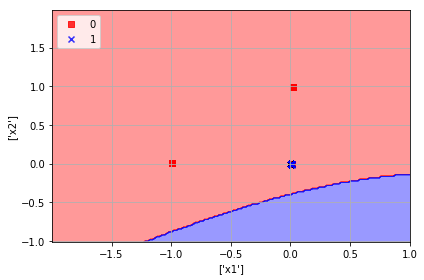

In [36]:
# Banknotes dataset
print(X_train1_v2)
mlp.fit(X_train1_v2.values,y_train1.values)
plot_decision_regions(X_train1_v2.values, y_train1.values, classifier=mlp, banknotes=1, mlp=1)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [37]:
# Banknotes dataset

print('Banknotes dataset')
print('the weights are \n',mlp.coefs_)
print('the bias \n ', mlp.intercepts_)
print('number of iterations \n', mlp.n_iter_)
print('output activation', mlp.out_activation_)

Banknotes dataset
the weights are 
 [array([[ 0.35264418, -0.47162568, -0.73279706,  0.14646804,  0.23624739,
        -0.23883792, -0.56376519, -0.20347208,  0.02237519,  0.49990188],
       [ 0.66494733,  0.33192128,  0.1987555 , -0.21044401, -0.1249839 ,
         0.53861657,  0.62282001,  0.64374303,  0.26022361,  0.20319801]]), array([[ 0.26708675,  0.43473446, -0.2673216 , -0.28828298, -0.45251555],
       [-0.33998475, -0.65904697,  0.43818032, -0.29682726, -0.0229604 ],
       [ 0.54829052, -0.38212217, -0.50555079,  0.56514492,  0.04146947],
       [ 0.39591882,  0.01015717, -0.32925673,  0.57919641,  0.01962639],
       [ 0.12869142,  0.02998793, -0.26369516,  0.55296738, -0.31960584],
       [ 0.50032302,  0.34539394, -0.62223651,  0.36642264, -0.3012383 ],
       [ 0.24031519, -0.46126022, -0.0338242 , -0.4921716 , -0.43074183],
       [ 0.43848437, -0.60073698,  0.43031576,  0.42791451,  0.49459137],
       [ 0.07881821,  0.54895923, -0.58245951,  0.1053575 ,  0.15720744],
 

In [38]:
# Nursery dataset

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

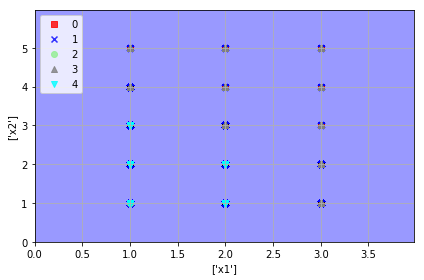

In [39]:
# Nursery dataset

mlp.fit(X_train2.values,y_train2.values)
plot_decision_regions(X_train2.values, y_train2.values, classifier=mlp)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [40]:
# Nursery dataset

print('Nursery dataset')
print('the weights are \n',mlp.coefs_)
print('the bias \n ', mlp.intercepts_)
print('number of iterations \n', mlp.n_iter_)
print('output activation', mlp.out_activation_)

Nursery dataset
the weights are 
 [array([[-0.63569988,  0.13215357, -0.38195936, -0.18711054,  0.09296449,
         0.50719132, -0.42358624,  0.23871764, -0.03223538, -0.15072407],
       [-0.66476887,  0.12345649, -0.32349299, -0.0793942 ,  0.08713578,
        -1.74693313, -0.5363492 , -0.0507487 , -0.01036767, -0.17951014],
       [ 0.12299168, -0.30811856, -0.14030423,  0.41887083, -0.02019471,
        -0.03194523,  0.25615955,  0.16508233, -0.12080362,  0.00203584],
       [ 0.12275963, -0.70592675, -0.20530013, -0.47383359, -0.07781985,
        -0.03112161,  0.26132912, -0.0917021 , -0.18771915,  0.17397115],
       [ 0.10291213,  0.90721578, -0.19079031,  0.00829978,  0.00745784,
        -0.00634867,  0.25054425,  0.17698394, -0.11679609,  0.50643847],
       [ 0.02571703,  1.51885328, -0.08024679, -0.38538667,  0.10721457,
         0.06482433,  0.14138326, -0.02133607,  0.02747632,  0.96604044],
       [ 0.06002811,  0.18335687,  0.11114775, -0.04312244, -0.52899762,
         0

### SVM

In [41]:
from sklearn.svm import SVC

# Banknotes dataset

svm=SVC(C=1.0,kernel='rbf', max_iter=2000, tol=1e-05, verbose=0)
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=2000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


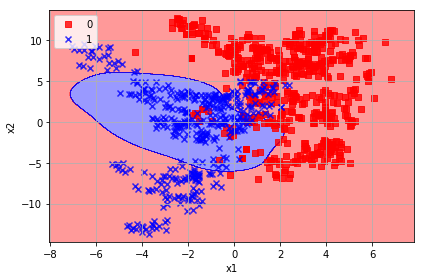

In [42]:
# Banknotes dataset

svm=svm.fit(X_train1.values, y_train1.values)
plot_decision_regions(X_train1.values, y_train1.values, classifier=svm, banknotes=1, mlp=0)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [43]:
# Banknotes dataset

print('Banknotes dataset')
print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)

Banknotes dataset
dual coef 
 [[-4.80949822e-01 -2.32288101e-01 -5.37562150e-01 -3.82034786e-02
  -1.19681353e-01 -3.48275701e-01 -3.39475664e-01 -5.82258794e-01
  -5.74910995e-01 -5.35966797e-02 -1.00000000e+00 -3.81913512e-01
  -4.96070754e-01 -2.55947383e-01 -1.54065310e-01 -4.32491870e-01
  -3.61354148e-01 -5.61868928e-01 -3.49608254e-01 -9.13631163e-02
  -4.75142612e-01 -4.16841150e-01 -1.41766829e-01 -8.82114118e-02
  -4.63820083e-01 -7.49094081e-02 -6.08653526e-02 -7.10172855e-01
  -4.85114073e-01 -5.85938727e-02 -4.72420581e-01 -5.78124850e-01
  -5.11571413e-01 -1.48383891e-01 -1.36902010e-01 -3.82115250e-01
  -2.53650013e-01 -1.90816641e-01 -4.60668480e-01 -4.19325380e-01
  -2.02693895e-01 -5.41943532e-01 -1.64003448e-01 -1.29138075e-01
  -1.85483525e-01 -2.82611892e-01 -5.99841983e-01 -1.64108712e-01
  -2.18358410e-02 -6.17231482e-02 -7.32537596e-02 -1.28598757e-01
  -1.08181595e-01 -2.33788943e-01 -3.88220047e-02 -3.16198382e-01
  -1.57776248e-01 -4.93223015e-03 -1.34840098e

In [44]:
# Nursery dataset

svm=SVC(C=1.0,kernel='rbf', max_iter=4000, tol=1e-05, verbose=0)
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=4000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

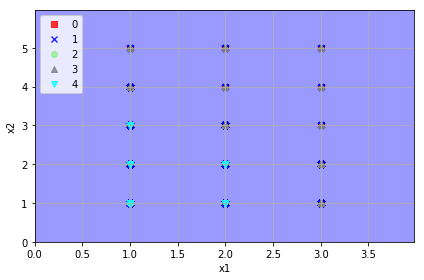

In [45]:
# Nursery dataset

svm=svm.fit(X_train2.values, y_train2.values)
plot_decision_regions(X_train2.values, y_train2.values, classifier=svm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [46]:
# Nursery dataset

print('Nursery dataset')
print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)

Nursery dataset
dual coef 
 [[ 0.36434178  0.50792171  0.14084538 ... -0.         -0.
  -0.        ]
 [ 0.01077154  0.          0.0149049  ... -1.         -1.
  -1.        ]
 [ 1.          0.          1.         ... -0.         -0.
  -0.        ]
 [ 0.08330919  0.32873433  0.06887818 ... -0.         -0.
  -0.        ]]
support vectors 
 [[1. 5. 4. ... 1. 3. 3.]
 [1. 3. 1. ... 1. 3. 3.]
 [3. 5. 4. ... 2. 3. 3.]
 ...
 [1. 3. 3. ... 2. 1. 1.]
 [1. 3. 2. ... 1. 1. 1.]
 [2. 1. 1. ... 1. 1. 1.]]
index of support vectors 
  [  55   66   69 ... 8878 8956 9021]
bias [ 0.32434131  0.9076199   0.17419248  0.5685845   1.15554089 -0.42391107
  3.66731209 -0.88524227 -1.12350885  1.06630465]
the classifier 
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=4000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)
